In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
shampoo = pd.read_csv('shampoo.csv',index_col = [0],parse_dates = True,squeeze = True)

In [5]:
shampoo.head()

Month
1-Jan    266.0
2-Jan    145.9
3-Jan    183.1
4-Jan    119.3
5-Jan    180.3
Name: Sales, dtype: float64

In [6]:
type(shampoo)

pandas.core.series.Series

In [7]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

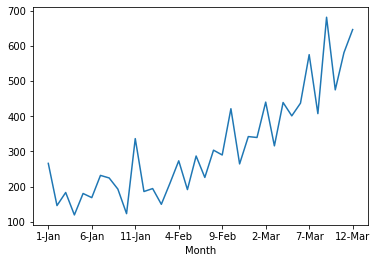

In [8]:
shampoo.plot()

In [9]:
#getting moving average
shampoo_ma = shampoo.rolling(window = 10).mean()

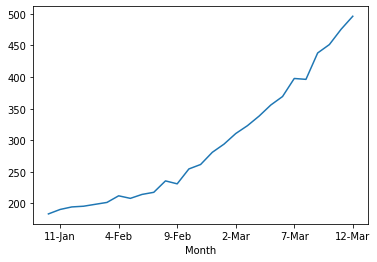

In [10]:
shampoo_ma.plot()

In [11]:
#creating base model
shampoo_base = pd.concat([shampoo,shampoo.shift(1)],axis =1)

In [12]:
shampoo_base


,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [13]:
shampoo_base.dropna(inplace = True)

In [14]:
shampoo_base.columns = ['Actual_Sales','Forcast_Sales']

In [15]:
shampoo_base


,Actual_Sales,Forcast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5
10-Jan,122.9,192.8


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
#calculating base model error
shampoo_error = np.sqrt(mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forcast_Sales))

In [18]:
shampoo_error

108.23764726616282

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

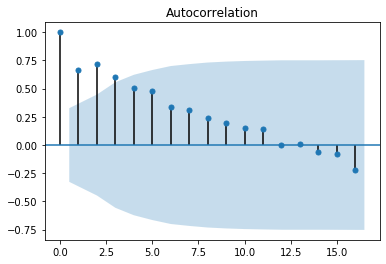

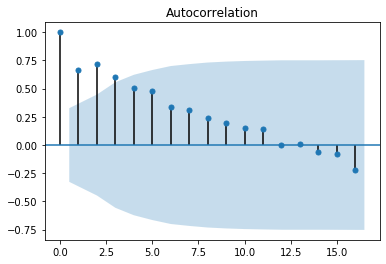

In [20]:
#q=3 p=2 d=0-2
plot_acf(shampoo)

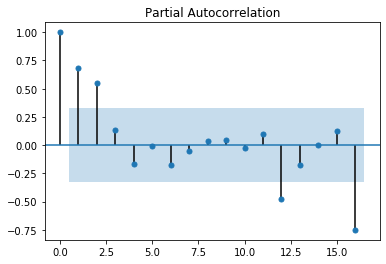

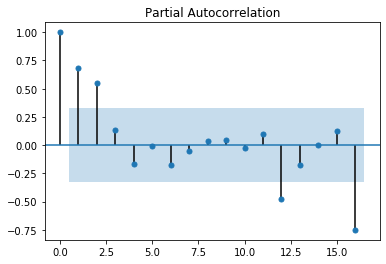

In [21]:
plot_pacf(shampoo)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [38]:
shampoo_model = ARIMA(shampoo_train, order = (1,1,1))

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
shampoo_model_fit = shampoo_model.fit()

In [40]:
shampoo_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -132.632
Method:                       css-mle   S.D. of innovations             56.308
Date:                Wed, 02 Sep 2020   AIC                            273.264
Time:                        12:57:53   BIC                            277.976
Sample:                             1   HQIC                           274.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9701      1.305      5.342      0.000       4.413       9.528
ar.L1.D.Sales    -0.2311      0.217     -1.064      0.287      -0.657       0.194
ma.L1.D.Sales    -1.0000      0.287     -3.489      0.000      -1.562      -0.438
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3271           +0.0000j            4.3271            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
shampoo_forecast = shampoo_model_fit.forecast()

In [27]:
start = len(shampoo_train)
end = len(shampoo_train) + len(shampoo_test) - 1

In [53]:
predictions = shampoo_model_fit.predict(start = start,end = end,typ = 'levels')

In [49]:
predictions = predictions.rename('Predictions')

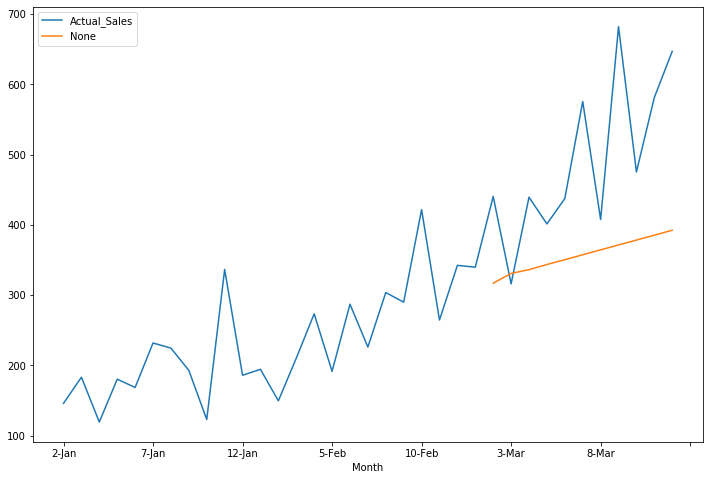

In [54]:
shampoo_base['Actual_Sales'].plot(figsize=(12,8), legend = True)
predictions.plot(legend = True)


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pmdarima

In [33]:
from pmdarima import auto_arima

In [34]:
stepwise_fit = auto_arima(shampoo_base['Actual_Sales'],start_p =0,start_q = 0, max_p =5, max_q = 4,seasonal = False,Trace = True)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -189.891
Date:                Wed, 02 Sep 2020   AIC                            387.783
Time:                        12:53:54   BIC                            393.888
Sample:                             0   HQIC                           389.865
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.8908      5.487      3.807      0.000      10.137      31.645
ar.L1         -0.5571      0.196     -2.836      0.005      -0.942      -0.172
ma.L1         -0.5465      0.203     -2.689      0.007      -0.945      -0.148
sigma2      4006.4661   1087.609      3.684      0.000    1874.792    6138.140
===================================================================================
Ljung-Box (Q):                       29.76   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.63   Prob(JB):                         0.71
Heteroskedasticity (H):               1.36   Skew:                             0.35
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""